In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os
import seaborn as sns
import plotly.express as px

#output_data_file = "output_data/.csv"

**1. Importing/Cleaning Data**

In [45]:
data_file = "Resources/life_expectancy_data_region.csv"
life_df = pd.read_csv(data_file)

#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Region", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]


life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS",
                        "under-five deaths": "Under Five Deaths"
                        })  

#Create 2 datasframes (1 with NaN = mean, 1 with NaN = 0)
nan0_df = life_df.fillna(0)
nan0_df = nan0_df.sort_values("Year")
mean_df = life_df.fillna(life_df.mean())
mean_df = mean_df.sort_values("Year")

#Create dataframes for each region for each broad dataframe
em_mean = mean_df[mean_df['Region']=='Eastern Mediterranean']
em_0 = nan0_df[nan0_df['Region']=='Eastern Mediterranean']

euro_mean = mean_df[mean_df['Region']=='Europe']
euro_0 = nan0_df[nan0_df['Region']=='Europe']

africa_mean = mean_df[mean_df['Region']=='Africa']
africa_0 = nan0_df[nan0_df['Region']=='Africa']

americas_mean = mean_df[mean_df['Region']=='Americas']
americas_0 = nan0_df[nan0_df['Region']=='Americas']

wp_mean = mean_df[mean_df['Region']=='Western Pacific']
wp_0 = nan0_df[nan0_df['Region']=='Western Pacific']

sea_mean = mean_df[mean_df['Region']=='South-East Asia']
sea_0 = nan0_df[nan0_df['Region']=='South-East Asia']

**2. Graphing Code**

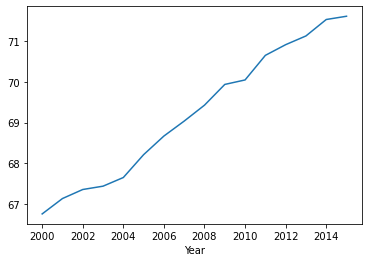

In [46]:
#Basic Line Graph: Life Expectancy vs. Time by Region (switch df for desired region)
le_time = mean_df.groupby(['Year']).mean()['Life Expectancy']
le_time.plot(kind='line')
plt.show()

The r-value is:
-0.5089650632982948


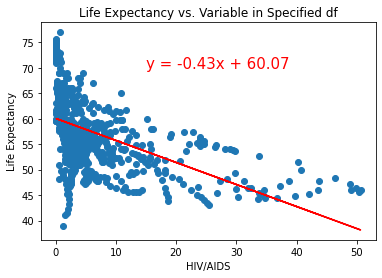

In [60]:
#Linear Regression/Basic Scatter Plot Code (switch df and x for desired outcome)
#Input Variable vs Life Expectancy
(slope, intercept, rvalue, pvalue, stderr) = linregress(africa_0["HIV/AIDS"], africa_0['Life Expectancy'])
regress_values = africa_0["HIV/AIDS"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Print r-value >>>>>>>>>>>>>> figure out print formatting
print("The r-value is:")
print(rvalue)

#Annotate LR, create labels, then print scatter plot w/ linear regress equation
plt.scatter(africa_0["HIV/AIDS"], africa_0['Life Expectancy'])
plt.plot(africa_0["HIV/AIDS"], regress_values, "r-")
plt.annotate(line_eq,(15,70),fontsize=15,color="red")
plt.xlabel("HIV/AIDS")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Variable in Specified df")
#plt.savefig("output_data/north_lat_vs_maxtemp.png")
plt.show()

<AxesSubplot:xlabel='Diphtheria', ylabel='Life Expectancy'>

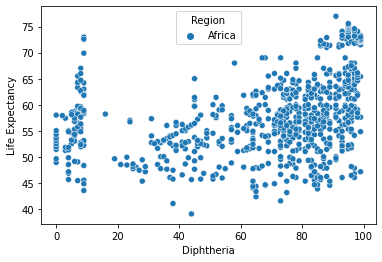

In [61]:
#Seaborn Scatter Plot for Input Variable(x) vs. Life Expectancy
sns.scatterplot(data=africa_0, x="Diphtheria", y="Life Expectancy", hue='Region')

In [54]:
max_HIV = nan0_df["HIV/AIDS"].max()
max_HIV

50.6

In [40]:
#Plotly Scatter Plot (switch out df and x_axis for desired outcome)
fig = px.scatter(africa_0, x="HIV/AIDS", y="Life Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Region", hover_name="Country",
           log_x=False, size_max=55, range_x=[0,100], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [25]:
import plotly.express as px

#clean_df = px.data.gapminder()
fig = px.scatter(nan0_df, x="Diphtheria", y="Life Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Region", hover_name="Country",
           log_x=False, size_max=55, range_x=[0,100], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

In [20]:
fig = px.scatter(clean_df, x="Diphtheria", y="Life Expectancy", animation_frame="Year", animation_group="Country",
           size="Population", color="Region", hover_name="Country",
           log_x=False, size_max=55, range_x=[0,100], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

NameError: name 'clean_df' is not defined